**Boston House Price Prediction using Linear Regression**

In [2]:
#Importing libraries
import numpy as np #to deal with arrays
import pandas as pd #to deal with dataframe
import sklearn #ScikitLearn

In [3]:
#Loading the dataset present in sklearn library itself
from sklearn.datasets import load_boston
dataframe=load_boston()

There are 506 rows and 13 attributes (features) with a target column (price). 
**CRIM** per capita crime rate by town 
**ZN** proportion of residential land zoned for lots over 25,000 sq.ft. **INDUS** proportion of non-retail business acres per town 
**CHAS** Charles River dummy variable (= 1 if tract bounds river; 0 otherwise) 
**NOX** nitric oxides concentration (parts per 10 million) 
**RM** average number of rooms per dwelling 
**AGE** proportion of owner-occupied units built prior to 1940 
**DIS** weighted distances to five Boston employment centres 
**RAD** index of accessibility to radial highways 
**TAX** full-value property-tax rate per 10,000 usd 
**PTRATIO** pupil-teacher ratio by town 
**B** 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town 
**LSTAT** % lower status of the population Each record in the database describes a Boston suburb or town.
**MEDV** median value of owner-occupied homes in $1000's

In [7]:
dataframe.keys() #Returns all the keys in dataset dictionary

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [8]:
print(dataframe.DESCR) #gives description about the dataset

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [10]:
dataframe.feature_names #features of Dataset

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [11]:
dataframe.filename #file name

'/usr/local/lib/python3.7/dist-packages/sklearn/datasets/data/boston_house_prices.csv'

In [13]:
dataframe.data

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [14]:
#Convert to pandas DataFrame
boston=pd.DataFrame(dataframe.data, columns=dataframe.feature_names)
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [15]:
#Adding new column of target values to dataframe
boston['MEDV']=dataframe.target
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [16]:
#Data Preprocessing
#Check for null values
boston.isnull()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,False,False,False,False,False,False,False,False,False,False,False,False,False,False
502,False,False,False,False,False,False,False,False,False,False,False,False,False,False
503,False,False,False,False,False,False,False,False,False,False,False,False,False,False
504,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [17]:
boston.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [23]:
#Splitting the data into trainiing and testing sets
from sklearn.model_selection import train_test_split
X = boston.drop('MEDV',axis=1)
Y = boston['MEDV']
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.15,random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(430, 13)
(76, 13)
(430,)
(76,)


In [24]:
#Let's import LinearRegression Model from sklearn and train it on training dataset
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [25]:
#Fitting the model on training data
model=LinearRegression()
model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [26]:
Y_train_predict=model.predict(X_train)
rmse=np.sqrt(mean_squared_error(Y_train, Y_train_predict))

print("The model performance for training set")
print(rmse)

The model performance for training set
4.710901797319796


In [27]:
#on testing set
Y_test_predict=model.predict(X_test)
rmse=np.sqrt(mean_squared_error(Y_test, Y_test_predict))

print("The model performance for testing set")
print(rmse)

The model performance for testing set
4.687543527902972


Text(0, 0.5, 'Predicted')

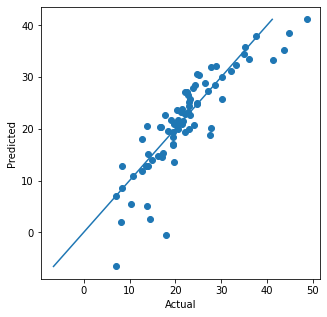

In [30]:
#representation
import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
plt.scatter(Y_test,Y_test_predict)
plt.plot([min(Y_test_predict),max(Y_test_predict)],[min(Y_test_predict),max(Y_test_predict)])
plt.xlabel('Actual')
plt.ylabel('Predicted')